In [ ]:
!git clone https://github.com/sergioo-herreraa/Sentiment-Analysis.git

Cloning into 'Sentiment-Analysis'...
remote: Enumerating objects: 44, done.
remote: Counting objects: 100% (44/44), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 44 (delta 20), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (44/44), 1.14 MiB | 5.63 MiB/s, done.
Resolving deltas: 100% (20/20), done.


In [ ]:
import numpy as np
import sys
sys.path.append('/content/Sentiment-Analysis')  # or the appropriate path

import project1 as p1
import utils

### In this part of the project, we test the 3 different algorithms that were implemented in the file project 1. Please see the file for more information on their implementation.

theta for Perceptron is 1.8809999999999982, 3.8159999999999963
theta_0 for Perceptron is -5.0


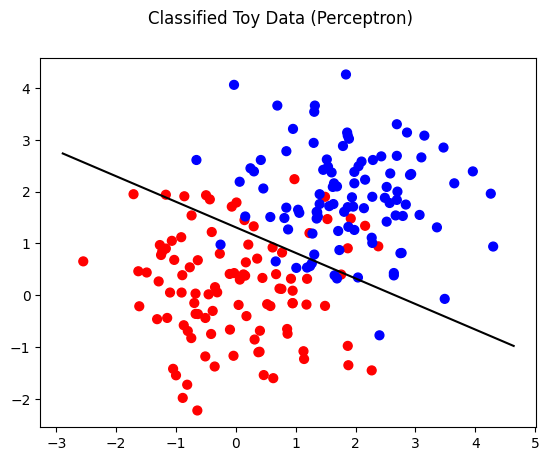

theta for Average Perceptron is 2.425476, 2.6097040000000176
theta_0 for Average Perceptron is -4.732


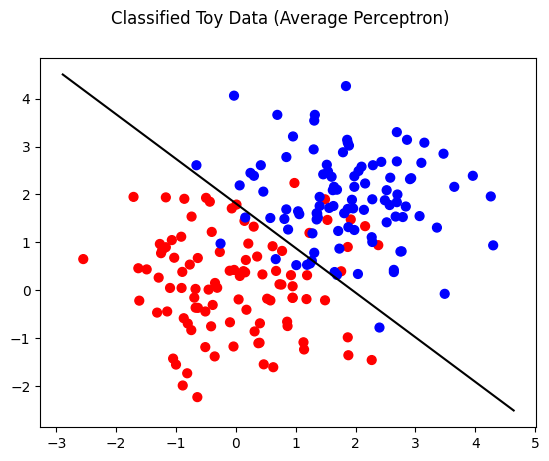

theta for Pegasos is 0.6878962360013456, 0.7620653856493942
theta_0 for Pegasos is -1.1216660077128084


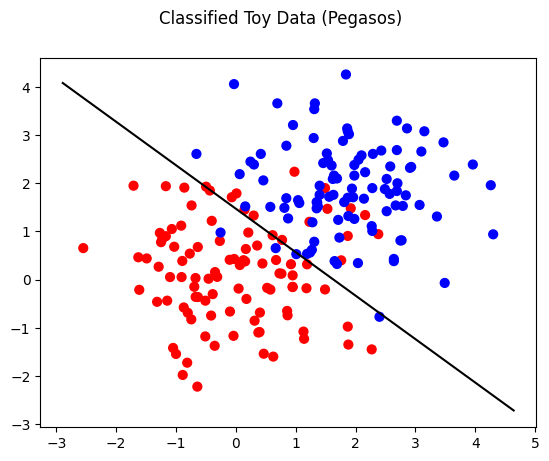

In [ ]:
#------------------------------------------------------------------------------
# Problem 5
#-------------------------------------------------------------------------------

toy_features, toy_labels = toy_data = utils.load_toy_data('/content/Sentiment-Analysis/toy_data.tsv')
#
T = 10
L = 0.2
#
thetas_perceptron = p1.perceptron(toy_features, toy_labels, T)
thetas_avg_perceptron = p1.average_perceptron(toy_features, toy_labels, T)
thetas_pegasos = p1.pegasos(toy_features, toy_labels, T, L)
#
def plot_toy_results(algo_name, thetas):
     print('theta for', algo_name, 'is', ', '.join(map(str,list(thetas[0]))))
     print('theta_0 for', algo_name, 'is', str(thetas[1]))
     utils.plot_toy_data(algo_name, toy_features, toy_labels, thetas)

plot_toy_results('Perceptron', thetas_perceptron)
plot_toy_results('Average Perceptron', thetas_avg_perceptron)
plot_toy_results('Pegasos', thetas_pegasos)

### We then load the dataset. Our training set consists of reviews written by Amazon customers for various food products. The reviews, originally given on a 5 point scale, have been adjusted to a +1 or -1 scale, representing a positive or negative review, respectively. We train the models and calculate the validation accuracy.

In [ ]:
#-------------------------------------------------------------------------------
# Data loading. There is no need to edit code in this section.
#-------------------------------------------------------------------------------

train_data = utils.load_data('/content/Sentiment-Analysis/reviews_train.tsv')
val_data = utils.load_data('/content/Sentiment-Analysis/reviews_val.tsv')
test_data = utils.load_data('/content/Sentiment-Analysis/reviews_test.tsv')

train_texts, train_labels = zip(*((sample['text'], sample['sentiment']) for sample in train_data))
val_texts, val_labels = zip(*((sample['text'], sample['sentiment']) for sample in val_data))
test_texts, test_labels = zip(*((sample['text'], sample['sentiment']) for sample in test_data))

dictionary = p1.bag_of_words(train_texts)

train_bow_features = p1.extract_bow_feature_vectors(train_texts, dictionary)
val_bow_features = p1.extract_bow_feature_vectors(val_texts, dictionary)
test_bow_features = p1.extract_bow_feature_vectors(test_texts, dictionary)


#-------------------------------------------------------------------------------
# Problem 7
#-------------------------------------------------------------------------------

T = 10
L = 0.01
#
pct_train_accuracy, pct_val_accuracy = \
  p1.classifier_accuracy(p1.perceptron, train_bow_features,val_bow_features,train_labels,val_labels,T=T)
print("{:35} {:.4f}".format("Training accuracy for perceptron:", pct_train_accuracy))
print("{:35} {:.4f}".format("Validation accuracy for perceptron:", pct_val_accuracy))
#
avg_pct_train_accuracy, avg_pct_val_accuracy = \
  p1.classifier_accuracy(p1.average_perceptron, train_bow_features,val_bow_features,train_labels,val_labels,T=T)
print("{:43} {:.4f}".format("Training accuracy for average perceptron:", avg_pct_train_accuracy))
print("{:43} {:.4f}".format("Validation accuracy for average perceptron:", avg_pct_val_accuracy))
#
avg_peg_train_accuracy, avg_peg_val_accuracy = \
  p1.classifier_accuracy(p1.pegasos, train_bow_features,val_bow_features,train_labels,val_labels,T=T,L=L)
print("{:50} {:.4f}".format("Training accuracy for Pegasos:", avg_peg_train_accuracy))
print("{:50} {:.4f}".format("Validation accuracy for Pegasos:", avg_peg_val_accuracy))

Training accuracy for perceptron:   0.9123
Validation accuracy for perceptron: 0.7860
Training accuracy for average perceptron:   0.8812
Validation accuracy for average perceptron: 0.7940
Training accuracy for Pegasos:                     0.8768
Validation accuracy for Pegasos:                   0.8040


### In this section, we train the algorithms by using different number of "epochs", as well as learning rates. We obtain the best number of epochs and the best learning rate (for the pegasos algorithm)

perceptron valid: [(1, np.float64(0.688)), (5, np.float64(0.782)), (10, np.float64(0.786)), (15, np.float64(0.706)), (25, np.float64(0.78)), (50, np.float64(0.788))]
best = 0.7880, T=50.0000
avg perceptron valid: [(1, np.float64(0.7)), (5, np.float64(0.768)), (10, np.float64(0.794)), (15, np.float64(0.796)), (25, np.float64(0.79)), (50, np.float64(0.788))]
best = 0.7960, T=15.0000
Pegasos valid: tune T [(1, np.float64(0.708)), (5, np.float64(0.744)), (10, np.float64(0.804)), (15, np.float64(0.776)), (25, np.float64(0.78)), (50, np.float64(0.806))]
best = 0.8060, T=50.0000
Pegasos valid: tune L [(0.001, np.float64(0.772)), (0.01, np.float64(0.806)), (0.1, np.float64(0.738)), (1, np.float64(0.642)), (10, np.float64(0.592))]
best = 0.8060, L=0.0100


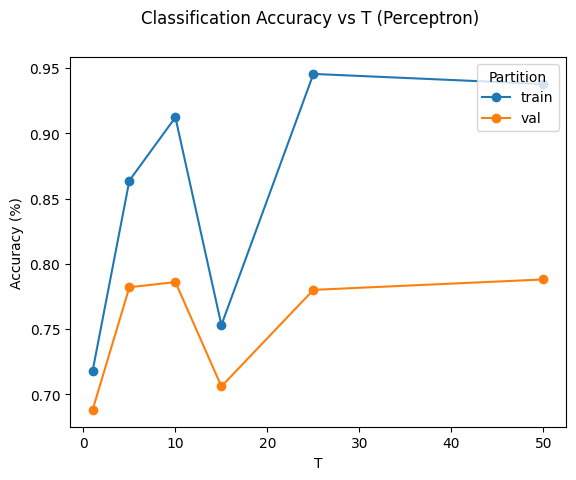

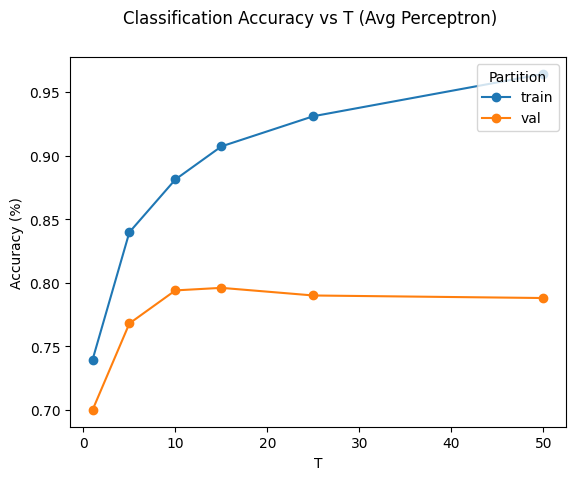

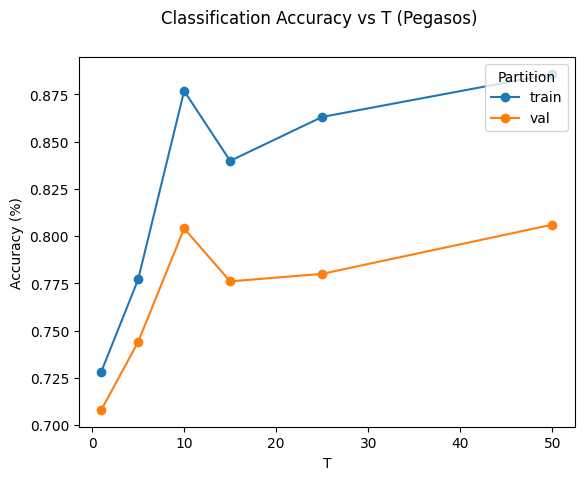

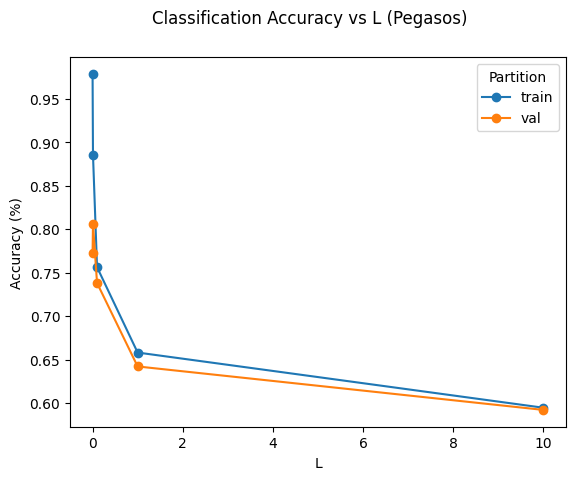

In [ ]:
#-------------------------------------------------------------------------------
# Problem 8
#-------------------------------------------------------------------------------

data = (train_bow_features, train_labels, val_bow_features, val_labels)
#
 # values of T and lambda to try
Ts = [1, 5, 10, 15, 25, 50]
Ls = [0.001, 0.01, 0.1, 1, 10]
#
pct_tune_results = utils.tune_perceptron(Ts, *data)
print('perceptron valid:', list(zip(Ts, pct_tune_results[1])))
print('best = {:.4f}, T={:.4f}'.format(np.max(pct_tune_results[1]), Ts[np.argmax(pct_tune_results[1])]))
#
avg_pct_tune_results = utils.tune_avg_perceptron(Ts, *data)
print('avg perceptron valid:', list(zip(Ts, avg_pct_tune_results[1])))
print('best = {:.4f}, T={:.4f}'.format(np.max(avg_pct_tune_results[1]), Ts[np.argmax(avg_pct_tune_results[1])]))

 # fix values for L and T while tuning Pegasos T and L, respective
fix_L = 0.01
peg_tune_results_T = utils.tune_pegasos_T(fix_L, Ts, *data)
print('Pegasos valid: tune T', list(zip(Ts, peg_tune_results_T[1])))
print('best = {:.4f}, T={:.4f}'.format(np.max(peg_tune_results_T[1]), Ts[np.argmax(peg_tune_results_T[1])]))
#
fix_T = Ts[np.argmax(peg_tune_results_T[1])]
peg_tune_results_L = utils.tune_pegasos_L(fix_T, Ls, *data)
print('Pegasos valid: tune L', list(zip(Ls, peg_tune_results_L[1])))
print('best = {:.4f}, L={:.4f}'.format(np.max(peg_tune_results_L[1]), Ls[np.argmax(peg_tune_results_L[1])]))
#
utils.plot_tune_results('Perceptron', 'T', Ts, *pct_tune_results)
utils.plot_tune_results('Avg Perceptron', 'T', Ts, *avg_pct_tune_results)
utils.plot_tune_results('Pegasos', 'T', Ts, *peg_tune_results_T)
utils.plot_tune_results('Pegasos', 'L', Ls, *peg_tune_results_L)

### From the previous results, we select the pegasos algorithm as the best algorithm, and we evaluate it on the test set. After that, we obtain the values of the parameters in theta, and we determine the words with the highest weighting. This gives us an idea of which words influence the most the decision to classify a review as positive.

In [ ]:
#-------------------------------------------------------------------------------
# Use the best method (perceptron, average perceptron or Pegasos) along with
# the optimal hyperparameters according to validation accuracies to test
# against the test dataset. The test data has been provided as
# test_bow_features and test_labels.
#-------------------------------------------------------------------------------

avg_peg_train_accuracy, avg_peg_val_accuracy = \
  p1.classifier_accuracy(p1.pegasos, train_bow_features, test_bow_features, train_labels, test_labels,T=50,L=0.01)
print("{:50} {:.4f}".format("Training accuracy for Pegasos:", avg_peg_train_accuracy))
print("{:50} {:.4f}".format("Testing accuracy for Pegasos:", avg_peg_val_accuracy))

theta, theta0 = p1.pegasos(train_bow_features, train_labels, 50, 0.01)

#-------------------------------------------------------------------------------
# Assign to best_theta, the weights (and not the bias!) learned by your most
# accurate algorithm with the optimal choice of hyperparameters.
#-------------------------------------------------------------------------------

best_theta = theta
wordlist   = [word for (idx, word) in sorted(zip(dictionary.values(), dictionary.keys()))]
sorted_word_features = utils.most_explanatory_word(best_theta, wordlist)
print("Most Explanatory Word Features")
print(sorted_word_features[:10])

Training accuracy for Pegasos:                     0.8858
Testing accuracy for Pegasos:                      0.7820
Most Explanatory Word Features
['delicious', 'great', 'loves', 'perfect', 'best', 'favorite', 'excellent', 'wonderful', 'tasty', 'find']
